In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

import pandas as pd

2024-04-12 10:38:38.836311: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 10:38:38.839842: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 10:38:38.946487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 10:38:38.948410: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 10:38:40.765002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
dataset = loadtxt('dataset_diabetes.csv', delimiter=',')
print(dataset.shape)
x = dataset[:,:-1]
y = dataset[:,-1:].reshape(-1)



(768, 9)


In [3]:
l = int(0.8 * x.shape[0])
x_train,x_val = x[:l,:],x[l:,:]
y_train,y_val = y[:l],y[l:]

In [4]:

def my_model(in_shape,out_shape=1):
    model = Sequential()
    model.add(Dense(8, input_shape=in_shape,activation='relu'))
    model.add(Dense(16, input_shape=(8,),activation='relu'))
    model.add(Dense(out_shape, input_shape=(16,),activation='sigmoid'))
    return model

In [5]:
import time


model = my_model((8,))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
tic = time.time()
history = model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=150, batch_size=10,verbose=1)
tac = time.time()
print(f"time {tac-tic}")
# _, accuracy = model.evaluate(X, y,verbose=1)
_, train_accuracy = model.evaluate(x_train, y_train,verbose=1)
_, val_accuracy = model.evaluate(x_val, y_val,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("val_accuracy : {:.2f}".format(val_accuracy))

Epoch 1/150
62/62 [==============================] - 2s 10ms/step - loss: 1.5436 - accuracy: 0.5358 - val_loss: 0.7410 - val_accuracy: 0.5909
Epoch 2/150
62/62 [==============================] - 0s 7ms/step - loss: 0.8316 - accuracy: 0.6303 - val_loss: 0.7213 - val_accuracy: 0.6169
Epoch 3/150
62/62 [==============================] - 0s 5ms/step - loss: 0.7435 - accuracy: 0.6254 - val_loss: 0.6544 - val_accuracy: 0.6364
Epoch 4/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.6661 - val_loss: 0.6489 - val_accuracy: 0.6494
Epoch 5/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6694 - val_loss: 0.6614 - val_accuracy: 0.6753
Epoch 6/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.6889 - val_loss: 0.6411 - val_accuracy: 0.6364
Epoch 7/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6190 - accuracy: 0.6808 - val_loss: 0.6498 - val_accuracy: 0.6688
Epoch 8/150


**Question : tracer ces courbes pour le MLP à deux couches cachées (32,16) et une taille de batch de 1. Que constatez vous ?**


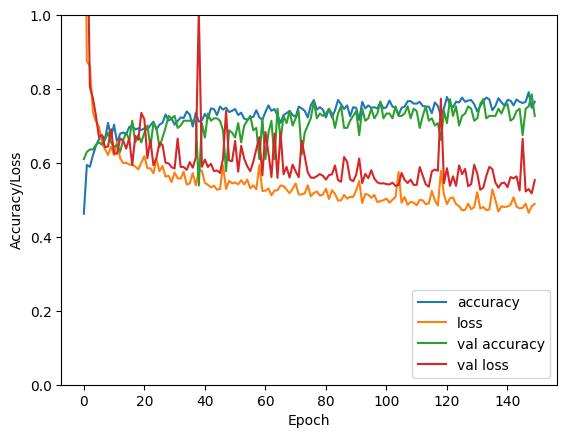

In [131]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Cas standard d'entraînement avec léger overfitting

**Question : analyser l'accuracy pour plusieurs valeurs de learning_rate et pour plusieurs algo d'apprentissage**

In [50]:
from tqdm import tqdm

optims = [tf.keras.optimizers.SGD, tf.keras.optimizers.RMSprop, tf.keras.optimizers.Adam, tf.keras.optimizers.AdamW, tf.keras.optimizers.Adagrad]
lrs = [1e-1,1e-4,1e-6]
histos = []
accs = []

for opt in tqdm(optims, position=0):
    hist_lr = []
    acc_lr = []
    for lr in tqdm(lrs, position=1):
        model = my_model((8,))
        model.compile(loss='binary_crossentropy', optimizer=opt(learning_rate=lr), metrics=['accuracy'])
        tic = time.time()
        history = model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=150, batch_size=10,verbose=0)
        tac = time.time()
        # print(f"time {tac-tic}")
        _, train_accuracy = model.evaluate(x_train, y_train,verbose=0)
        _, val_accuracy = model.evaluate(x_val, y_val,verbose=0)
        acc_lr.append([train_accuracy,val_accuracy])
        hist_lr.append(history)
    
    histos.append(hist_lr)
    accs.append(acc_lr)
    


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [05:43<00:00, 68.61s/it]


# Save and load trained model

In [59]:
model_path = "temp/regressionML.keras"
model.save(model_path)
restored_model = tf.keras.models.load_model(model_path)
restored_model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
pred = model.predict(x_train)
restored_pred = restored_model.predict(x_train)

 1/20 [>.............................] - ETA: 0s

20/20 [==============================] - 0s 645us/step


In [70]:
X_1=np.array([5.8,2.6,4.0,1.2,2.4,1.8,6.2,0.1]).reshape((1,-1))
X_2=np.array([6.3,3.3,6.0,2.5,2.4,1.8,6.2,0.1]).reshape((1,-1))
res1=model.predict([X_1])
res2=model.predict([X_2])
print('classe {0} and classe {1}'.format(round(res1[0,0]),round(res2[0,0])))

1/1 [==============================] - 0s 34ms/step
classe 1 and classe 1


In [82]:
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="./temp/weights-{epoch:03d}-{val_loss:.4f}.hdf5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="./temp/weights-cb.hdf5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)
callbacks = [checkpoint]
history=model.fit(x_train, y_train, epochs=200, batch_size=10, shuffle=True, validation_split=0.2, callbacks=callbacks, verbose=2)


Epoch 1/200



Epoch 1: val_loss improved from inf to 0.32289, saving model to ./temp/weights-cb.hdf5
50/50 - 0s - loss: 0.4232 - accuracy: 0.7902 - val_loss: 0.3229 - val_accuracy: 0.8699 - 282ms/epoch - 6ms/step
Epoch 2/200

Epoch 2: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4153 - accuracy: 0.7963 - val_loss: 0.3783 - val_accuracy: 0.7805 - 162ms/epoch - 3ms/step
Epoch 3/200


/home/menierc/PhD/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4355 - accuracy: 0.7963 - val_loss: 0.4107 - val_accuracy: 0.8211 - 158ms/epoch - 3ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4716 - accuracy: 0.7576 - val_loss: 0.3531 - val_accuracy: 0.8537 - 149ms/epoch - 3ms/step
Epoch 5/200

Epoch 5: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4212 - accuracy: 0.8024 - val_loss: 0.4391 - val_accuracy: 0.7886 - 385ms/epoch - 8ms/step
Epoch 6/200

Epoch 6: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4344 - accuracy: 0.8024 - val_loss: 0.3320 - val_accuracy: 0.8699 - 172ms/epoch - 3ms/step
Epoch 7/200

Epoch 7: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4189 - accuracy: 0.8024 - val_loss: 0.3353 - val_accuracy: 0.8293 - 184ms/epoch - 4ms/step
Epoch 8/200

Epoch 8: val_loss did not improve from 0.32289
50/50 - 0s - loss: 0.4197 - accuracy: 0.7984 - val_loss: 0.3401 - val_accuracy: 0.8618 - 180

**Question : une fois l'entraînement terminé, charger le dernier fichier de poids sauvegardé avec la callback et inférer ce réseau sur la base x_train afin d'en calculer la précision
comme vous l'avez fait dans le sujet précédent**

In [83]:
restored_model = my_model((8,))
restored_model.load_weights("./temp/weights-cb.hdf5")

pred = restored_model.predict(x_train)
acc = ((pred>0.5).reshape((-1))==y_train).sum()/pred.shape[0]
print(f"accuracy : {acc}")

20/20 [==============================] - 0s 923us/step


# scaling

In [99]:
from sklearn.preprocessing import StandardScaler

# en reprenant les x_train, X_val, y_train, y_val précédents
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.fit_transform(x_val)

model = my_model((8,))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# entraînement sur le dataset standardisé
history=model.fit(x_train_scaled, y_train, epochs=350, batch_size=10, shuffle=False, validation_data=(X_val_scaled,y_val), callbacks=callbacks)

Epoch 1/350
50/62 [=======================>......] - ETA: 0s - loss: 0.6889 - accuracy: 0.5760
Epoch 1: val_loss did not improve from 0.32289
62/62 [==============================] - 1s 6ms/step - loss: 0.6650 - accuracy: 0.6091 - val_loss: 0.6092 - val_accuracy: 0.6494
Epoch 2/350
53/62 [========================>.....] - ETA: 0s - loss: 0.5581 - accuracy: 0.7321
Epoch 2: val_loss did not improve from 0.32289
62/62 [==============================] - 0s 5ms/step - loss: 0.5465 - accuracy: 0.7378 - val_loss: 0.5581 - val_accuracy: 0.7143
Epoch 3/350
58/62 [===========================>..] - ETA: 0s - loss: 0.5110 - accuracy: 0.7534
Epoch 3: val_loss did not improve from 0.32289
62/62 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7541 - val_loss: 0.5288 - val_accuracy: 0.7597
Epoch 4/350
55/62 [=========================>....] - ETA: 0s - loss: 0.4978 - accuracy: 0.7545
Epoch 4: val_loss did not improve from 0.32289
62/62 [==============================] - 0s 3

In [104]:
std  = np.sqrt(scaler.var_)
mean = scaler.mean_
X=np.array([[6.,148.,72.,35.,0.,33.6,0.627,50.]])
X_1_scaled = (X_1 - mean) / std

res1=model.predict([X_1_scaled])
res2=model.predict([X])
print('classe {0} '.format(round(res1[0,0])))

1/1 [==============================] - 0s 20ms/step
classe 1 


1.0

# Multiclass

In [151]:
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris.keys()

x = iris["data"]

# On créé une liste qui contient 1 lorsque la fleur est de type 2 et 0 sinon pour faire une classification
y = iris["target"]

y_cat = tf.keras.utils.to_categorical(y, 3)
x_train, x_val, y_train, y_val = train_test_split(x, y_cat, test_size=0.2, random_state=2)


In [153]:

def my_model(in_shape,out_shape=1):
    model = Sequential()
    model.add(Dense(8, input_shape=in_shape,activation='relu'))
    model.add(Dense(16, input_shape=(8,),activation='relu'))
    model.add(Dense(out_shape, input_shape=(16,),activation='sigmoid'))
    return model

In [154]:
model = my_model((4,),out_shape=3)
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
tic = time.time()
history = model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=150, batch_size=10,verbose=1)
tac = time.time()
print(f"time {tac-tic}")
# _, accuracy = model.evaluate(X, y,verbose=1)
_, train_accuracy = model.evaluate(x_train, y_train,verbose=1)
_, val_accuracy = model.evaluate(x_val, y_val,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("val_accuracy : {:.2f}".format(val_accuracy))

Epoch 1/150
12/12 [==============================] - 1s 30ms/step - loss: 0.9919 - accuracy: 0.3500 - val_loss: 1.0605 - val_accuracy: 0.2667
Epoch 2/150
12/12 [==============================] - 0s 10ms/step - loss: 0.8955 - accuracy: 0.3500 - val_loss: 0.9590 - val_accuracy: 0.2667
Epoch 3/150
12/12 [==============================] - 0s 7ms/step - loss: 0.8249 - accuracy: 0.3500 - val_loss: 0.8821 - val_accuracy: 0.2667
Epoch 4/150
12/12 [==============================] - 0s 5ms/step - loss: 0.7731 - accuracy: 0.3500 - val_loss: 0.8198 - val_accuracy: 0.2667
Epoch 5/150
12/12 [==============================] - 0s 5ms/step - loss: 0.7295 - accuracy: 0.3500 - val_loss: 0.7702 - val_accuracy: 0.2667
Epoch 6/150
12/12 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.3500 - val_loss: 0.7299 - val_accuracy: 0.2667
Epoch 7/150
12/12 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.3500 - val_loss: 0.6931 - val_accuracy: 0.2667
Epoch 8/150

In [157]:
predictions = np.argmax(model.predict(x_train),axis=1)
print(predictions.shape)

4/4 [==============================] - 0s 2ms/step


(120,)


# MNIST

In [160]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [164]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [165]:
from tensorflow.keras.layers import Flatten

def my_model(in_shape=(28, 28),out_shape=10):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

model = my_model()
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_190 (Dense)           (None, 64)                50240     
                                                                 
 dense_191 (Dense)           (None, 32)                2080      
                                                                 
 dense_192 (Dense)           (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Question : Afficher les courbes d'apprentissage sur les configurations du MLP suivantes (256,128) (128,64) (64,32) (32,16)**


In [175]:
def my_model(in_shape=(28, 28),out_shape=10):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(out_shape, activation='softmax'))
    
    return model

model = my_model()
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_208 (Dense)           (None, 256)               200960    
                                                                 
 dense_209 (Dense)           (None, 128)               32896     
                                                                 
 dense_210 (Dense)           (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [177]:
model.predict(x_train[:15,:]).shape

1/1 [==============================] - 0s 35ms/step


(15, 10)

In [179]:
model = my_model()
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
tic = time.time()
history = model.fit(x_train, y_train_cat,validation_data=(x_test,y_test_cat),epochs=10, batch_size=10,verbose=1)
tac = time.time()
print(f"time {tac-tic}")
# _, accuracy = model.evaluate(X, y,verbose=1)
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, val_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("val_accuracy : {:.2f}".format(val_accuracy))

Epoch 1/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0349 - accuracy: 0.9434 - val_loss: 0.0191 - val_accuracy: 0.9681
Epoch 2/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0151 - accuracy: 0.9759 - val_loss: 0.0147 - val_accuracy: 0.9758
Epoch 3/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0108 - accuracy: 0.9829 - val_loss: 0.0147 - val_accuracy: 0.9784
Epoch 4/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0080 - accuracy: 0.9874 - val_loss: 0.0164 - val_accuracy: 0.9781
Epoch 5/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0069 - accuracy: 0.9894 - val_loss: 0.0131 - val_accuracy: 0.9829
Epoch 6/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0056 - accuracy: 0.9916 - val_loss: 0.0147 - val_accuracy: 0.9806
Epoch 7/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0047 - accuracy: 0.9930 - val_loss: 0.0153 - val_ac

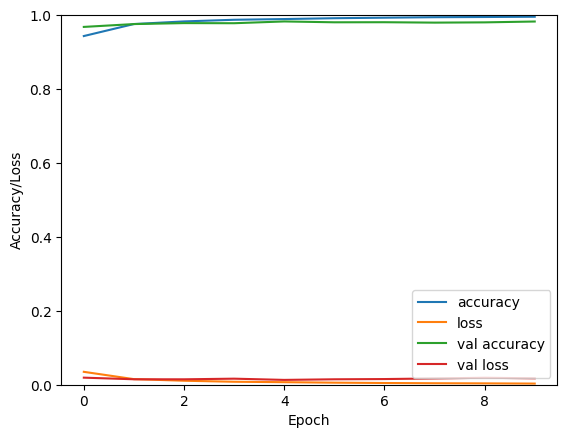

In [180]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')